In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Algoritam K Sredina
Algoritam k sredina pronalazi k klastera u podacima koje predstavlja pomocu
k centroida tih klastera, od kojih se svaka dobija uprosecavanjem elemenata datog
klastera. Ova pretpostavka cini algoritam primenljivim samo na podatke
koji se mogu uprosecavati, poput vektora.

Polaznih k centroida se bira nasumicno (mada, ako korisnik zna nesto o strukturi
svojih podataka, mogu biti i unapred date), a potom se ponavljaju sledeci koraci:

1. rasporediti sve instance u nove klastere tako sto se svaka instanca pridruzi najblizoj centroidi
2. izracunati nove centroide kao prosek instanci koje su im pridruˇzene.

<img src='https://i.stack.imgur.com/gFaCT.png'>

In [11]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

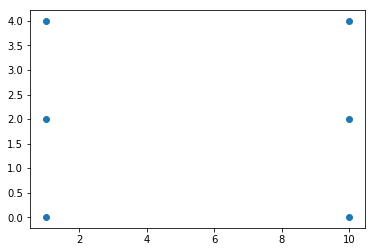

In [12]:
plt.scatter(X[:, 0], X[:, 1])

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [23]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [24]:
X_predicted = kmeans.predict(X)
X_predicted

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [26]:
colors = ['red', 'blue']

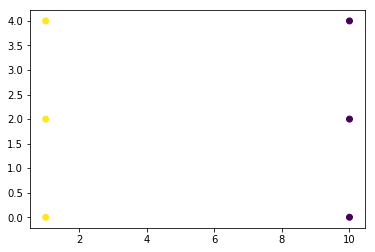

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=X_predicted)

## Pravilo lakta (odabir parametra `k` za broj klastera

In [18]:
X, y = make_blobs(100, n_features=2, centers=4, random_state=6)

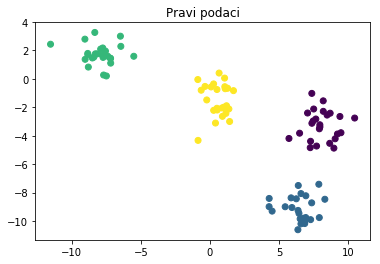

In [21]:
plt.title('Pravi podaci')
plt.scatter(X[:, 0], X[:, 1], c=y)

In [24]:
Ks = range(1, 10)

In [25]:
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]

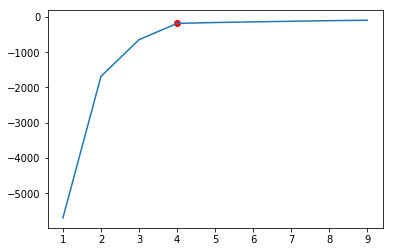

In [28]:
plt.plot(Ks, score)
plt.scatter(4, score[3], c='red')

Zakljucujemo da je potrebno odabrati `k = 4` jer je nakon toga drasticno manja promena.

In [29]:
kmeans = KMeans(n_clusters=4).fit(X)

In [30]:
predicted_y = kmeans.predict(X)

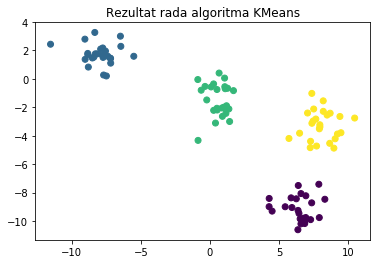

In [32]:
plt.title('Rezultat rada algoritma KMeans')
plt.scatter(X[:, 0], X[:, 1], c=predicted_y)